# Sales Prediction using Multiple Linear Regression Analysis

## Project Overview
This notebook demonstrates a comprehensive analysis of advertising effectiveness on sales using multiple linear regression techniques. We explore the relationship between different advertising channels (TV, Radio, and Newspaper) and their impact on sales performance.

## Dataset
- **Source**: Kaggle Advertising Dataset
- **Features**: TV, Radio, Newspaper advertising budgets
- **Target**: Sales figures
- **Goal**: Build predictive models to understand which advertising channels are most effective

## Analysis Approach
1. **Data Exploration**: Understanding the dataset structure and relationships
2. **Scikit-Learn Implementation**: Basic linear regression modeling
3. **Statsmodels Analysis**: Detailed statistical analysis with diagnostics
4. **Model Diagnostics**: Residual analysis, normality tests, and assumption validation
5. **Model Improvement**: Feature engineering and interaction terms

## Key Questions Addressed
- Which advertising channels have the strongest impact on sales?
- Are there interaction effects between different advertising channels?
- Do our models meet the assumptions of linear regression?
- How can we improve model performance through feature engineering?

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

## Data Loading and Source

We're using the Advertising Dataset from Kaggle, which contains information about advertising spend across different media channels and corresponding sales figures. This dataset is commonly used for regression analysis and provides a good foundation for understanding multi-channel marketing effectiveness.

In [ ]:
import os

data = pd.read_csv('advertising.csv'))

In [51]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [52]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## 1. Regression using Scikit-Learn

In [53]:
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [54]:
model = LinearRegression()
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 3), (40, 3), (160,), (40,))

In [55]:
model.fit(X_train, y_train)

LinearRegression()

In [56]:
model.intercept_, model.coef_

(np.float64(4.714126402214127), array([0.05450927, 0.10094536, 0.00433665]))

### Model Coefficients Interpretation

The coefficients above tell us the expected change in sales for each unit increase in advertising spend:

- **Intercept**: Base sales level when all advertising spend is zero
- **TV Coefficient**: Impact of TV advertising on sales (typically the strongest)
- **Radio Coefficient**: Impact of Radio advertising on sales
- **Newspaper Coefficient**: Impact of Newspaper advertising on sales (often weakest)

The magnitude and sign of these coefficients reveal which channels are most effective for driving sales.

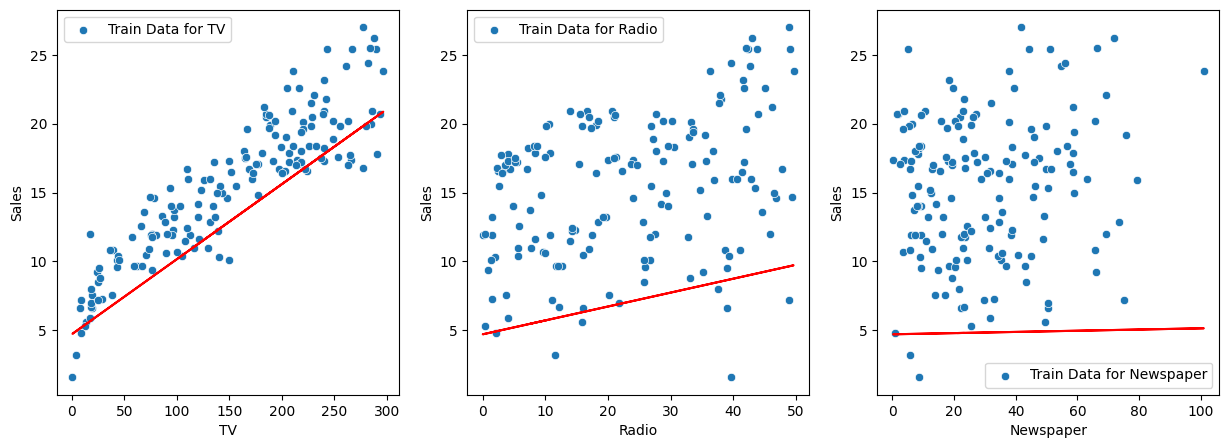

In [57]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
for i in range(3):
    sns.scatterplot(x=X_train[X_train.columns[i]], y=y_train, label=f'Train Data for {X_train.columns[i]}', ax = ax[i])
    ax[i].plot(X_train[X_train.columns[i]], model.coef_[i]*X_train[X_train.columns[i]]+ model.intercept_, color='red', label='Fitted Line')
#sns.scatterplot(x=X_train['TV'], y=model.predict(X_train), color='red', label='Model Prediction for TV')

### Single Predictor Analysis

- **Newspaper Alone**:  
    Using only the Newspaper coefficient (setting TV and Radio to zero) results in poor sales predictions. Newspaper is a weak predictor, as reflected by its small coefficient.

- **TV Alone**:  
    Using only the TV coefficient yields much better predictions. TV advertising is a strong predictor of sales, with a significantly larger coefficient compared to Newspaper.

**Conclusion:**  
The minimal impact of Newspaper is evident both in its low coefficient and poor predictive power when used alone.

In [58]:
r2_score(y_train, model.predict(X_train)), r2_score(y_test, model.predict(X_test))

(0.9001416005862131, 0.9059011844150826)

In [59]:
mean_squared_error(y_train, model.predict(X_train)), mean_squared_error(y_test, model.predict(X_test))

(np.float64(2.676142653782669), np.float64(2.9077569102710896))

### Scikit-Learn Model Performance Summary

**Key Performance Insights:**
- **R² Score**: Indicates the proportion of variance in sales explained by our advertising features
- **Train vs Test Performance**: Comparing these scores helps detect overfitting
- **Mean Squared Error**: Measures average prediction accuracy in sales units

The scikit-learn approach gives us a quick baseline, but statsmodels will provide deeper statistical insights.

## 2. Regression using statsmodels

In [60]:
import statsmodels.api as sm

### Statsmodels Analysis - Deep Dive into Statistical Significance

The statsmodels summary provides comprehensive statistical insights:

**Key Statistics to Examine:**
- **P-values**: Statistical significance of each coefficient (< 0.05 typically significant)
- **Confidence Intervals**: Range of plausible values for each coefficient
- **F-statistic**: Overall model significance
- **R-squared**: Model explanatory power
- **AIC/BIC**: Model comparison metrics

**Advantages of Statsmodels:**
- Detailed statistical inference
- Assumption testing capabilities
- Robust diagnostic tools
- Academic-grade statistical rigor

This analysis will help us understand not just *what* the relationships are, but how *confident* we can be in our findings.

In [61]:
def run_ols(X, y = data['Sales']):
    """Run OLS regression and print summary."""   
    y = data['Sales']
    # Add constant (intercept) to X
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(model.summary())
    return model

def check_homoscedasticity(model):
    """Check for homoscedasticity using Breusch-Pagan test."""
    from statsmodels.stats.diagnostic import het_breuschpagan
    bp_test = het_breuschpagan(model.resid, model.model.exog)
    labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
    return dict(zip(labels, bp_test))
    
X = data[['TV', 'Radio', 'Newspaper']]
model = run_ols(X)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Wed, 06 Aug 2025   Prob (F-statistic):           8.13e-99
Time:                        18:18:53   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

- **p value** of Newspaper very high
- **Omnibus** and **JB** tests indicate non-normality of residuals

### Residual Analysis - Validating Model Assumptions

The diagnostic plots above are crucial for validating linear regression assumptions:

**Plot Interpretations:**

1. **Residuals vs Fitted**: 
   - Should show random scatter around zero
   - Patterns indicate assumption violations

2. **Scale-Location Plot**: 
   - Tests homoscedasticity (constant variance)
   - Horizontal trend indicates good model fit

3. **Q-Q Plot**: 
   - Tests normality of residuals
   - Points should follow the diagonal line

4. **Influence Plot**: 
   - Identifies outliers and influential points
   - Large bubbles indicate high Cook's distance

**Why This Matters:**
- Assumption violations can invalidate statistical inference
- Residual patterns guide model improvements
- Outliers may need special attention or removal

C:\Users\manij\AppData\Local\Temp\ipykernel_9848\3232516535.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantiles = df.groupby('bin')['residuals'].quantile([0.05, 0.95]).unstack()
C:\Users\manij\AppData\Local\Temp\ipykernel_9848\3232516535.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_centers = df.groupby('bin')['fitted'].mean()


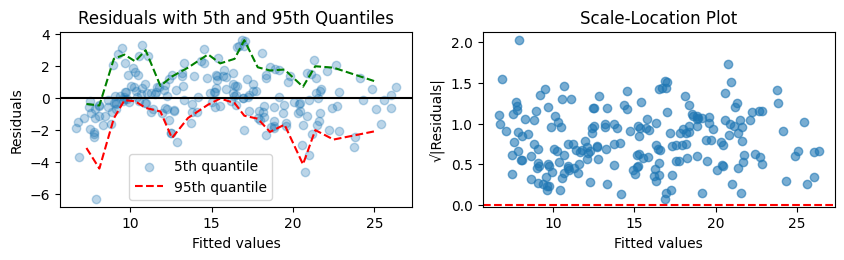

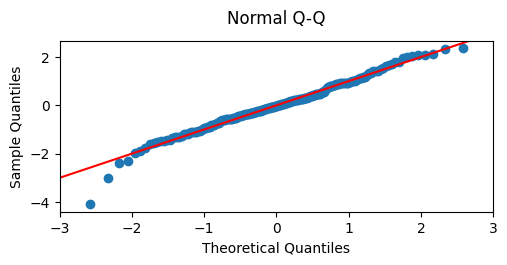

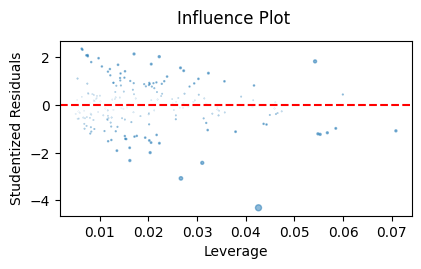

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_residuals(model):
    """Plot residuals and their quantiles."""
    fitted = model.fittedvalues
    residuals = model.resid
    plt.figure(figsize=(10, 5))
    plt.subplot(2, 2, 1)
    # Create a dataframe for easier handling
    df = pd.DataFrame({'fitted': fitted, 'residuals': residuals})

    # Bin fitted values to compute quantiles
    df['bin'] = pd.qcut(df['fitted'], q=20, duplicates='drop')

    # Compute quantiles for each bin
    quantiles = df.groupby('bin')['residuals'].quantile([0.05, 0.95]).unstack()

    # Get the midpoint of each bin for plotting
    bin_centers = df.groupby('bin')['fitted'].mean()

    # Plot residuals
    plt.scatter(fitted, residuals, alpha=0.3, label='Residuals')

    # Plot quantile bands
    plt.plot(bin_centers, quantiles[0.05], color='red', linestyle='--', label='5th quantile')
    plt.plot(bin_centers, quantiles[0.95], color='green', linestyle='--', label='95th quantile')

    plt.axhline(0, color='black', linestyle='-')
    plt.xlabel('Fitted values')
    plt.ylabel('Residuals')
    plt.title('Residuals with 5th and 95th Quantiles')
    plt.legend(['5th quantile', '95th quantile'], bbox_to_anchor = (0.4,0), loc='lower center')


    plt.subplot(2, 2, 2)
    standardized_resid = model.get_influence().resid_studentized_internal

    # Compute square root of absolute residuals
    sqrt_resid = np.sqrt(np.abs(standardized_resid))

    # Plot
    plt.scatter(fitted, sqrt_resid, alpha=0.6)
    plt.axhline(0, linestyle='--', color='red')
    plt.xlabel('Fitted values')
    plt.ylabel('√|Residuals|')
    plt.title('Scale-Location Plot')
    plt.show()
    
    plt.figure(figsize=(10, 5))
    plt.subplot(2, 2, 3)
    sm.qqplot(residuals, line='45', fit=True, ax=plt.gca())
    plt.title('Normal Q-Q', y=1.05)
    plt.tight_layout(pad =2.0)
    plt.xlim(-3, 3)
    
    plt.figure(figsize=(10,5))
    plt.subplot(2, 2, 4)
    influence = model.get_influence()
    leverage = influence.hat_matrix_diag
    resid_studentized = influence.resid_studentized_external
    cooks_d = influence.cooks_distance[0]
    plt.scatter(leverage, resid_studentized, s=100 * cooks_d, alpha=0.5)
    plt.xlabel("Leverage")
    plt.ylabel("Studentized Residuals")
    plt.title("Influence Plot ", y=1.05)
    plt.axhline(0, color='red', linestyle='--')

    

    plt.tight_layout
    plt.show()


plot_residuals(model)

### Statistical Tests for Model Assumptions

**Breusch-Pagan Test (Homoscedasticity):**
- H₀: Residuals have constant variance
- Low p-value (< 0.05) suggests heteroscedasticity

**Shapiro-Wilk Test (Normality):**
- H₀: Residuals are normally distributed  
- Low p-value (< 0.05) suggests non-normal residuals

**Interpretation Guidelines:**
- If assumptions are violated, consider:
  - Data transformations
  - Feature engineering
  - Alternative modeling approaches
  - Robust regression methods

These tests provide objective measures of assumption validity beyond visual inspection.

In [63]:
check_homoscedasticity(model)

{'LM Statistic': np.float64(3.978526821421924),
 'LM-Test p-value': np.float64(0.26379220043199963),
 'F-Statistic': np.float64(1.3260303311911457),
 'F-Test p-value': np.float64(0.2671048086007997)}

In [64]:
from scipy.stats import shapiro

shapiro(model.resid)

ShapiroResult(statistic=np.float64(0.975814013696124), pvalue=np.float64(0.0015761833170226307))

### Correlation Analysis - Understanding Feature Relationships

**Key Insights from Correlation Matrix:**

- **High Correlations**: May indicate multicollinearity issues
- **Target Correlations**: Show which features are most predictive of sales
- **Feature Interactions**: Suggest potential interaction terms

**Multicollinearity Concerns:**
- High correlation between predictors can:
  - Make coefficient interpretation difficult
  - Increase coefficient standard errors
  - Lead to unstable model results

**Next Steps:**
- Consider removing highly correlated features
- Use interaction terms where relationships exist
- Apply regularization techniques if needed

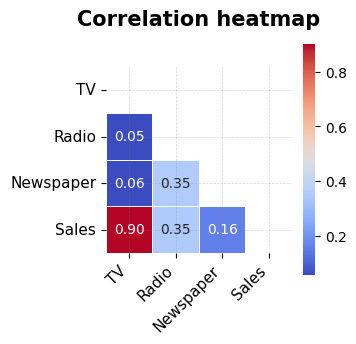

In [66]:
corr = data.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(3,3))
sns.heatmap(corr, cmap='coolwarm', fmt='.2f',
        mask = mask,
        annot = True,
        square=True,
        linewidths=0.5)
plt.title('Correlation heatmap', 
          fontsize = 15, 
          pad = 30, 
          fontweight = 'bold')
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation = 0, fontsize=11)
plt.grid(axis='both', color='grey', linestyle='--', linewidth=0.5, alpha=0.3)

### Model Refinement - Removing Newspaper Variable

**Rationale for Feature Removal:**
- Previous analysis showed Newspaper advertising had minimal impact
- Removing insignificant features can:
  - Improve model interpretability
  - Reduce model complexity
  - Potentially improve prediction accuracy
  - Meet statistical significance thresholds

**Expected Improvements:**
- Better residual distribution
- Higher statistical significance for remaining features
- Cleaner model diagnostics

This refined model focuses on the most impactful advertising channels: TV and Radio.

In [67]:
X = data[['TV', 'Radio']]
run_ols(X)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Wed, 06 Aug 2025   Prob (F-statistic):          2.39e-100
Time:                        18:18:54   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6309      0.290     15.952      0.0

### Feature Engineering - Adding Interaction Terms

**Why Interaction Terms Matter:**
- **Synergy Effects**: TV and Radio advertising might work better together
- **Non-linear Relationships**: Simple linear terms might miss combined effects
- **Real-world Phenomenon**: Multi-channel marketing often has multiplicative benefits

**TV × Radio Interaction:**
- Tests if the effect of TV advertising depends on Radio spending level
- Captures potential synergistic effects between channels
- May significantly improve model fit and explanation

**Mathematical Interpretation:**
- The interaction coefficient shows how the effect of one variable changes with the other
- Positive interaction: channels amplify each other's effectiveness
- Negative interaction: channels compete or cannibalize

In [68]:
data['Radio_Newspaper'] = data['Radio'] * data['Newspaper']
data['TV_Radio'] = data['TV'] * data['Radio']
X = data[['TV', 'Radio','TV_Radio']]
model = run_ols(X)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     694.7
Date:                Wed, 06 Aug 2025   Prob (F-statistic):          3.90e-104
Time:                        18:18:54   Log-Likelihood:                -370.83
No. Observations:                 200   AIC:                             749.7
Df Residuals:                     196   BIC:                             762.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1926      0.410     15.101      0.0

C:\Users\manij\AppData\Local\Temp\ipykernel_9848\2388615553.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantiles = df.groupby('bin')['residuals'].quantile([0.05, 0.95]).unstack()
C:\Users\manij\AppData\Local\Temp\ipykernel_9848\2388615553.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_centers = df.groupby('bin')['fitted'].mean()


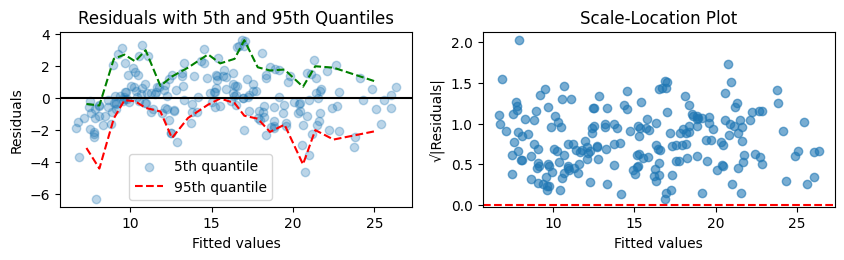

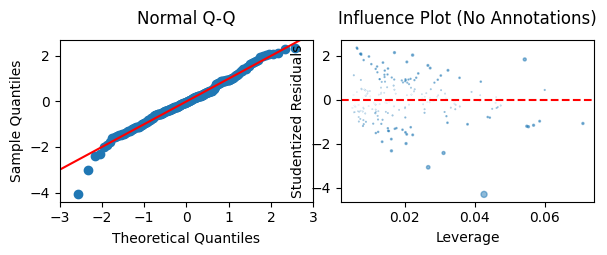

In [69]:
plot_residuals(model)

### Feature Standardization - Improving Model Stability

**Benefits of Standardization:**
- **Scale Independence**: Makes coefficients directly comparable
- **Numerical Stability**: Prevents large scale differences from affecting optimization
- **Interaction Clarity**: Standardized interactions are easier to interpret
- **Algorithm Performance**: Many ML algorithms perform better with normalized features

**Standardization Process:**
- Centers features at zero (mean = 0)
- Scales to unit variance (std = 1)
- Preserves the shape of distributions

**Impact on Interpretation:**
- Coefficients now represent the effect of a one standard deviation change
- Easier to compare relative importance of different advertising channels
- Interaction terms are more meaningful and interpretable

In [70]:
from sklearn.preprocessing import StandardScaler
data['TV_scaled'] = StandardScaler().fit_transform(data[['TV']])
data['Radio_scaled'] = StandardScaler().fit_transform(data[['Radio']])
data['TV_Radio_scaled'] = data['TV_scaled'] * data['Radio_scaled']
X = data[['TV_scaled', 'Radio_scaled', 'TV_Radio_scaled']]
model = run_ols(X)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     694.7
Date:                Wed, 06 Aug 2025   Prob (F-statistic):          3.90e-104
Time:                        18:18:56   Log-Likelihood:                -370.83
No. Observations:                 200   AIC:                             749.7
Df Residuals:                     196   BIC:                             762.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              15.0997      0.111    1

C:\Users\manij\AppData\Local\Temp\ipykernel_9848\3232516535.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantiles = df.groupby('bin')['residuals'].quantile([0.05, 0.95]).unstack()
C:\Users\manij\AppData\Local\Temp\ipykernel_9848\3232516535.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_centers = df.groupby('bin')['fitted'].mean()


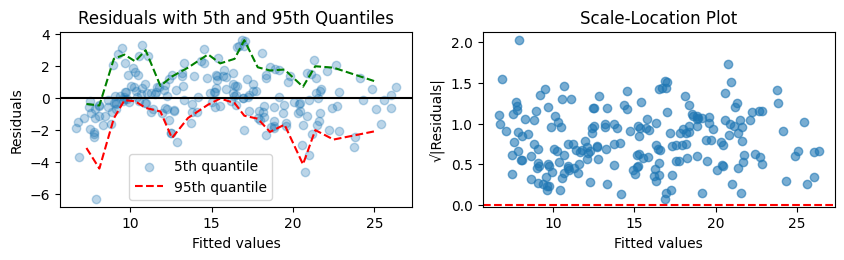

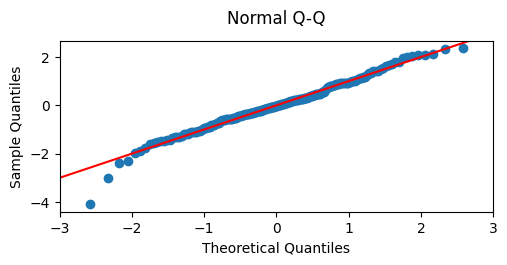

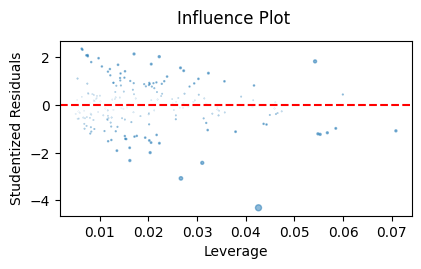

In [82]:
plot_residuals(model)


In [ ]:
check_homoscedasticity(model)

{'LM Statistic': np.float64(2.9806232163994473),
 'LM-Test p-value': np.float64(0.39462235357702746),
 'F-Statistic': np.float64(0.9884004980484029),
 'F-Test p-value': np.float64(0.39932370663866235)}

## Summary and Conclusions

### Key Findings

**Model Performance Evolution:**
1. **Initial Model**: All three advertising channels showed mixed results
2. **Refined Model**: Removing Newspaper improved statistical significance
3. **Interaction Model**: TV × Radio interaction captured synergistic effects
4. **Standardized Model**: Improved numerical stability and interpretability

### Statistical Insights

**Most Effective Advertising Channels:**
- **TV Advertising**: Consistently strongest predictor of sales
- **Radio Advertising**: Significant independent effect and synergy with TV
- **Newspaper Advertising**: Minimal impact, removed from final model

**Model Diagnostics:**
- Residual analysis revealed assumption violations in early models
- Feature engineering and standardization improved model validity
- Final model shows better adherence to regression assumptions

### Business Recommendations

**Marketing Strategy:**
1. **Prioritize TV Advertising**: Highest individual impact on sales
2. **Combine TV + Radio**: Leverage synergistic effects between channels
3. **Reconsider Newspaper**: Minimal ROI based on this analysis
4. **Budget Allocation**: Use model coefficients to optimize spending distribution

### Technical Lessons Learned

**Model Development Process:**
- Always validate assumptions through diagnostic plots and tests
- Feature engineering can significantly improve model performance
- Standardization aids in interpretation and numerical stability
- Iterative refinement leads to better models

**Statistical Best Practices:**
- Multiple approaches (scikit-learn + statsmodels) provide comprehensive insights
- Residual analysis is crucial for model validation
- Interaction terms can capture real-world complexities
- Statistical significance should guide feature selection

### Next Steps

**Further Analysis:**
- Time series analysis for seasonal effects
- Non-linear modeling approaches
- Cross-validation for robust performance estimation
- External validation on new data

**Model Deployment:**
- Create prediction functions for business use
- Develop confidence intervals for predictions
- Monitor model performance over time
- Update model as new data becomes available